In [5]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Twitter API Keys
consumer_key = "INSERT KEY"
consumer_secret = "INSERT KEY"
access_token = "INSERT KEY"
access_token_secret = "INSERT KEY"

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
# Target Account
target_user = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through twitter and pull 100 tweets per news organization
for user in target_user:

    # Get all tweets from home feed
    public_tweets = api.user_timeline(user, count = 100)
    
    counter = 1

    # Loop through all tweets 
    for tweet in public_tweets:
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
            # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
            # Add sentiments for each tweet into a list
        sentiments.append({"User" : user,
                           "Date": tweet["created_at"], 
                            "Compound": compound,
                            "Positive": pos,
                            "Negative": neu,
                            "Neutral": neg,
                            "Tweets Ago": counter,
                          "Text": tweet["text"]})
        
            # Add to counter 
        counter += 1

In [7]:
# Create DataFrame From Dictionary
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago,User
0,-0.4019,Tue Jun 05 19:25:03 +0000 2018,0.863,0.137,0.000,'The problem with plastic is that it never goe...,1,@BBC
1,-0.7184,Tue Jun 05 19:02:05 +0000 2018,0.727,0.273,0.000,#OurGirl is back and heading to Nigeria in the...,2,@BBC
2,0.0000,Tue Jun 05 18:02:06 +0000 2018,1.000,0.000,0.000,"👶🥦 If your child's a fussy eater, here are 5 t...",3,@BBC
3,0.8221,Tue Jun 05 16:50:46 +0000 2018,0.719,0.000,0.281,RT @BBCTwo: Always wanted to pitch an idea to ...,4,@BBC
4,-0.6486,Tue Jun 05 16:31:52 +0000 2018,0.777,0.223,0.000,"💔 Fashion designer Kate Spade, 55, has been fo...",5,@BBC
5,-0.1531,Tue Jun 05 16:00:22 +0000 2018,0.814,0.110,0.076,♻️🗑 These protesters want shops to take more r...,6,@BBC
6,0.6369,Tue Jun 05 13:01:07 +0000 2018,0.840,0.000,0.160,❤️😽 This man has vowed to be the best 'cat dad...,7,@BBC
7,0.6696,Tue Jun 05 12:00:22 +0000 2018,0.640,0.000,0.360,😂 These knitted Poldark dolls are the best!\n#...,8,@BBC
8,0.4019,Tue Jun 05 11:12:05 +0000 2018,0.863,0.000,0.137,"RT @BBC_ARoadshow: From artists to explorers, ...",9,@BBC
9,0.0000,Tue Jun 05 11:00:07 +0000 2018,1.000,0.000,0.000,How does plastic actually enter our oceans? \n...,10,@BBC


In [8]:
# Export the DataFrame to as csv 
sentiments_pd.to_csv("Twitter_News_Mood.csv", index=False)

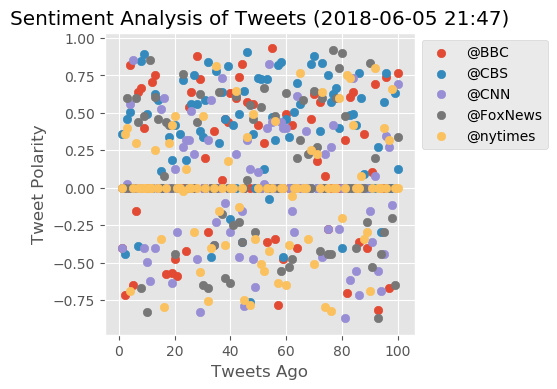

In [24]:
# Create plot
plt.figure(figsize=(4,4), dpi=100)
# Plot Scatterplot Using a For Loop.
for user in target_user:
    dataframe = sentiments_pd.loc[sentiments_pd["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
    plt.legend(bbox_to_anchor = (1,1))

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now})")
# plt.xlim(101, -1)

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
lgd = plt.legend(bbox_to_anchor = (1,1))

# Save Graph as PNG

plt.savefig("Sentiment_Analysis_Of_Tweets.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

In [10]:
# Find Averages
average_sentiment = sentiments_pd.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.104977
@CBS        0.315567
@CNN       -0.006664
@FoxNews    0.066939
@nytimes   -0.009290
Name: Compound, dtype: float64

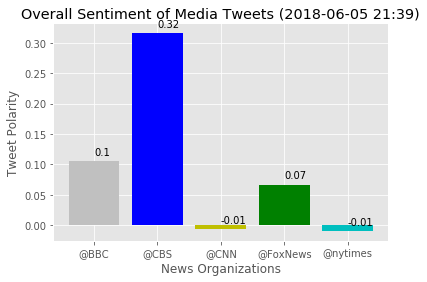

In [11]:
# Graph
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])

# Set title, x axis label, and y axis label.
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Sentiment of Media Tweets ({now})")
plt.xlabel("News Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")

# Save Graph as PNG
plt.savefig("Overall_Sentiment_Of_Media_Tweets.png")

plt.show()